이 노트북은 [이제현 박사님의 블로그](https://jehyunlee.github.io/2023/01/01/Python-DS-125-rpa/) 내용을 필사한 것입니다. 공부 목적 외에 의도는 없음을 밝힙니다. 

# Impact of RPA

+ RPA(Robotic Precess Automation: 업무 자동화)과제를 하려고 합니다.
+ RPA를 적용하면 효용이 얼마나 좋은지를 설득하기 위한 그림을 그립니다.
+ RPA 도입 전과 후를 비교하는 그림을 그려서 보여줍시다.

# 1. 행정 업무
![](https://jehyunlee.github.io/2023/01/01/Python-DS-125-rpa/125_rpa_01.png)

+ 어떤 가상의 데이터 관련 행정 업무가 있다고 합시다.
+ 현재는 __총 2천만원의 용역비를_ 포함해 __12주가__ 걸립니다. __수작업이기__ 때문입니다. 
+ 여기에 RPA를 적용하면, __용역비가 없이지고__ 이어지는 작업도 훨씬 짧게 걸립니다.
+ 서류 작업과 취합 작업도 단순 반복 작업에서 __검증으로 업무 성격이 바뀝니다.__
+ __보고서나 기획서등에서__ 이 훌륭한 업무를 어필하고 싶습니다.
+ 일단 엑셀로 정리해보니 이렇습니다. 전달은 되는데 아쉽습니다.

![](https://jehyunlee.github.io/2023/01/01/Python-DS-125-rpa/125_rpa_02.png)

# 2. 시각화

## 2.1. 용역 비용 & 인력

+ RPA 효과는 크게 두 가지입니다. 하나는 __용역 비용,__ 하나는 __인력__
+ 인력도 man-week(MW)으로 정리했기 때문에 담당자의 연봉을 적용하면 비용 산정이 됩니다.
+ 하지만 여기선 용역은 용역, 인력은 인력으로 나누어 그리기로 합니다.
+ 항목 수에 따라 용역 비용과 인력이 그려질 공간을 1:3의 비율로 분할합니다.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings(action='ignore') 

sns.set_context('talk')
plt.rcParams["font.family"] = "맑은 고딕"
plt.rcParams["axes.unicode_minus"] = False


In [18]:
# matplotlib 한글 폰트 설정
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/Gulim.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Windows\\Fonts\\Gulim.ttf'

findfont: Font family ['맑은 고딕'] not found. Falling back to DejaVu Sans.


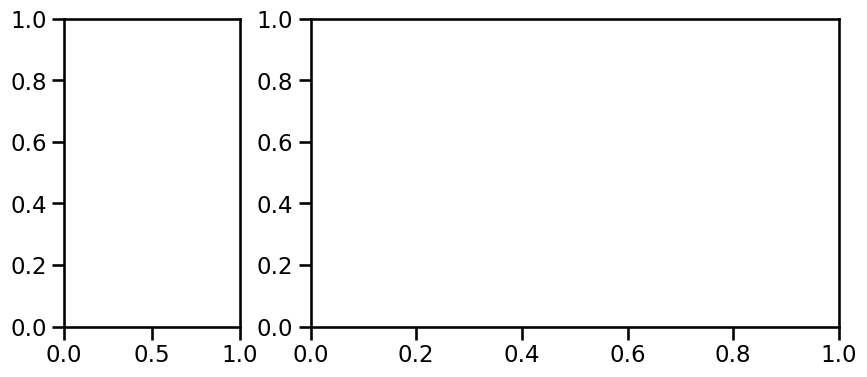

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4), gridspec_kw={"width_ratios":[1, 3]})

## 2.2. 용역 비용

+ 왼쪽 공간에 RPA 적용 전 2천만원이 들어간 용역 비용과 적용 후 0원이 된 것을 비교하여 그립니다.
+ 이럴 때는 grouped bar plot이 제격입니다.
+ 용역 비용 뿐 아니라 다른 모든 항목을 비교할 것이기 때문에 __RPA 전__ 과 __RPA 후__ 비교에 일관성이 필요합니다.
+ 적용 전과 후를 __"brown"__ 과 __"royalblue"__ 로 표기합니다.
+ 또한, __grouped bar plot__ 은 __pandas가 더 편합니다.__
+ pandas DataFrame에서 그림을 그릴 부분만 `.loc[]`를 사용해 데이터를 한정하고,
+ `.plot.bar()`를 사용해 grouped bar plot을 그립니다.
+ `cs = ["brown", "royalblue']`과 `color=cs`를 입력하면 적용 전과 후 색이 차례로 입혀집니다.

In [12]:
# data 
data = [[20000, 0],
     [12, 2],
     [2, 0.5],
     [1, 0.5]]
rpa = pd.DataFrame(data, 
                   index=[["분석 용역", "용역 검증", "서류 작업", "취합 작업"], ["비용", "인력(MW)", "인력(MW)", "인력(MW)"]],
                   columns=["As-Is", "To-Be"]
)

rpa

,,As-Is,To-Be
분석 용역,비용,20000,0.0
용역 검증,인력(MW),12,2.0
서류 작업,인력(MW),2,0.5
취합 작업,인력(MW),1,0.5


In [13]:
rpa.loc[["분석 용역"]]

,,As-Is,To-Be
분석 용역,비용,20000,0.0


<AxesSubplot:>

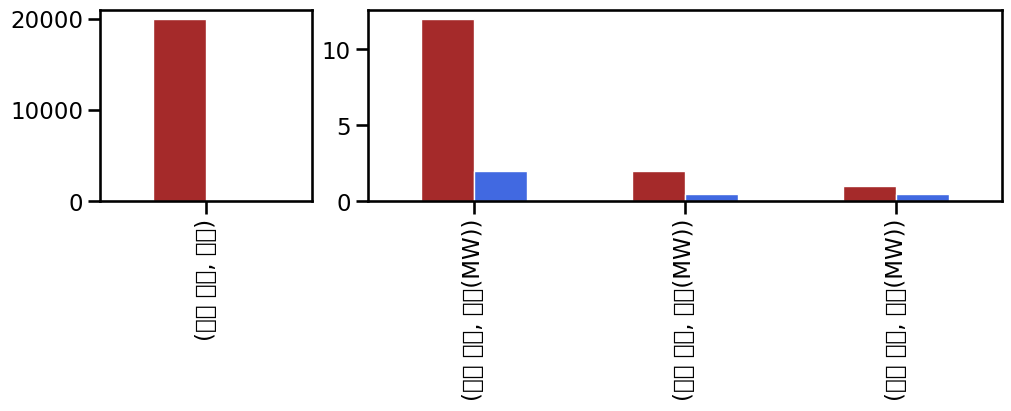

In [14]:
# visualization

fig, axs = plt.subplots(ncols=2, figsize=(10, 4), gridspec_kw={"width_ratios":[1, 3]}, constrained_layout=True)
cs = ["brown", "royalblue"]

# 용역 비용
rpa.iloc[[0]].plot.bar(ax=axs[0], lw=1, ec="w", legend=False, color=cs)

# 인력
rpa.iloc[1:].plot.bar(ax=axs[1], lw=1, ec="w", legend=False, color=cs)

## 2.3. Annotation

+ 가장 중요한 틀이 갖춰졌습니다.
+ 이제 ticks, ticklabels 등을 다듬으면 쓸만한 그래프가 될겁니다.
+ 하지만 그 전에, 데이터를 직설적으로 알려주는 장치를 하려고 합니다.
+ 위 코드 아래에 코드를 덧붙여 bar 위에 데이터를 출력합니다.

In [15]:


# 용역 비용
xs, ws, hs = [], [], []

for p, c in zip(axs[0].patches, cs):
    x, w, h = p.get_x(), p.get_width(), p.get_height()
    xs.append(x)
    ws.append(w)
    hs.append(h)
    
    cost = format(int(h), ',')
    
    if h > 0:
        cost = f"{cost} 천원"
    else:
        cost = f"{cost} 원"
    axs[0].text(x+w/2, h+1000, cost, ha="center", fontsize="small", fontweight="bold", color=c, zorder=3)



+ 왼쪽 Axes를 구성하는 두 막대의 위치, 너비, 높이를 뽑아내 글자를 입혔습니다.
+ 일반적으로 금액을 __천원__ 단위로 표현하기 때문에 일부러 엑셀 파일부터 천원으로 끊었습니다.

## 2.4. Spines and Ticks

+ 이제 y축이 없어도 데이터가 잘 전달됩니다.
+ y축과 함께 네모난 테두리(spines)를 없애버립시다.
+ x축 눈금은 `tick_params()`를 사용해 폭을 0으로 (`width=0`) 만듭니다.
+ 그런데 xticklabel은 여기 말고도 오른족 Axes에도 세 개나 더 적용해야 됩니다.
+ `font_label`이라는 Dictionary type 매개변수를 만들어 적용합니다.

In [7]:
# Spines and Ticks
axs[0].spines[['left', 'top', 'right']].set_visible(False)
axs[0].set_yticks([])
font_label = {'color':'gray', 'fontweight':'bold'}
axs[0].tick_params(axis='x', width=0)
axs[0].set_xtickabels(["용역 비용"], **font_label, rotation=0) 

AttributeError: 'AxesSubplot' object has no attribute 'set_xtickabels'